# Linear Regression

## WorkFlow
1. Import the necessary libraries
2. Get the data ready
3. Build the model (Linear Regression Model)
4. Pick up a Loss Function and Optimizer
5. Build a Training Loop
6. Evaluate the model
7. Test the Model with New Data Points
8. Save the Model

## 1. Import the necessary libraries

In [93]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

## 2. Get the data ready

In [94]:
x_train: np.ndarray = np.array(
    object=[
        [3.3],
        [4.4],
        [5.5],
        [6.71],
        [6.93],
        [4.168],
        [9.779],
        [6.182],
        [7.59],
        [2.167],
        [7.042],
        [10.791],
        [5.313],
        [7.997],
        [3.1],
    ],
    dtype=np.float32,
)

print(f"X Train: \n{x_train}")
print(f"X_train shape: {x_train.shape}")

y_train: np.ndarray = np.array(
    object=[
        [1.7],
        [2.76],
        [2.09],
        [3.19],
        [1.694],
        [1.573],
        [3.366],
        [2.596],
        [2.53],
        [1.221],
        [2.827],
        [3.465],
        [1.65],
        [2.904],
        [1.3],
    ],
    dtype=np.float32,
)

print(f"\nY Train: \n{y_train}")
print(f"Y_train shape: {y_train.shape}")

X Train: 
[[ 3.3  ]
 [ 4.4  ]
 [ 5.5  ]
 [ 6.71 ]
 [ 6.93 ]
 [ 4.168]
 [ 9.779]
 [ 6.182]
 [ 7.59 ]
 [ 2.167]
 [ 7.042]
 [10.791]
 [ 5.313]
 [ 7.997]
 [ 3.1  ]]
X_train shape: (15, 1)

Y Train: 
[[1.7  ]
 [2.76 ]
 [2.09 ]
 [3.19 ]
 [1.694]
 [1.573]
 [3.366]
 [2.596]
 [2.53 ]
 [1.221]
 [2.827]
 [3.465]
 [1.65 ]
 [2.904]
 [1.3  ]]
Y_train shape: (15, 1)


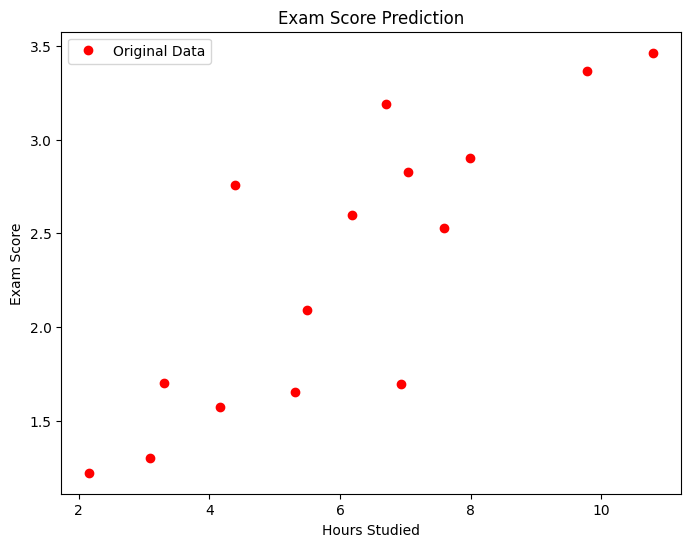

In [95]:
fig: plt.Figure = plt.figure(figsize=(8, 6))
plt.plot(x_train, y_train, "ro", label="Original Data")
plt.xlabel(xlabel="Hours Studied")
plt.ylabel(ylabel="Exam Score")
plt.title(label="Exam Score Prediction")
plt.legend(loc="upper left")
plt.show()

### Convert data to tensors from numpy arrays

In [96]:
x_train: torch.Tensor = torch.from_numpy(x_train)
y_train: torch.Tensor = torch.from_numpy(y_train)

print(f"X Train: \n{x_train}")
print(f"X_train shape: {x_train.shape}")

print(f"\nY Train: \n{y_train}")
print(f"Y_train shape: {y_train.shape}")

X Train: 
tensor([[ 3.3000],
        [ 4.4000],
        [ 5.5000],
        [ 6.7100],
        [ 6.9300],
        [ 4.1680],
        [ 9.7790],
        [ 6.1820],
        [ 7.5900],
        [ 2.1670],
        [ 7.0420],
        [10.7910],
        [ 5.3130],
        [ 7.9970],
        [ 3.1000]])
X_train shape: torch.Size([15, 1])

Y Train: 
tensor([[1.7000],
        [2.7600],
        [2.0900],
        [3.1900],
        [1.6940],
        [1.5730],
        [3.3660],
        [2.5960],
        [2.5300],
        [1.2210],
        [2.8270],
        [3.4650],
        [1.6500],
        [2.9040],
        [1.3000]])
Y_train shape: torch.Size([15, 1])


## 3. Build the model (Linear Regression Model)

In [97]:
class LinearRegression(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.linear: nn.Linear = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear(x)

In [98]:
model = LinearRegression()
print(model)

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


**While Model Training only these two parameters (weight and bias) will be trained (changed).**

In [99]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[-0.6652]])),
             ('linear.bias', tensor([-0.6916]))])

In [100]:
# While Model Training only these two parameters (weight and bias) will be trained (changed)
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[-0.6652]], requires_grad=True)
Parameter containing:
tensor([-0.6916], requires_grad=True)


In [101]:
print(list(model.linear.parameters()))

[Parameter containing:
tensor([[-0.6652]], requires_grad=True), Parameter containing:
tensor([-0.6916], requires_grad=True)]


In [102]:
params = model.parameters()
print(params)
list(params)

<generator object Module.parameters at 0x119808200>


[Parameter containing:
 tensor([[-0.6652]], requires_grad=True),
 Parameter containing:
 tensor([-0.6916], requires_grad=True)]

## 4. Pick up a Loss Function and Optimizer

In [103]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=1e-4)

## 5. Build a Training Loop

In [104]:
EPOCHS = 600

In [105]:
for epoch in range(1, EPOCHS):
    model.train()  # set the model to training mode
    out = model(x_train)  # make predictions using forward pass
    loss = criterion(out, y_train)  # calculate the loss
    optimizer.zero_grad()  # zero the gradients before running the backward pass
    loss.backward()  # calculate the gradients
    optimizer.step()  # update the weights
    if epoch % 50 == 0:
        print(f"Epoch [ {epoch}/{EPOCHS} ] Loss: {loss.item():.6f}")

Epoch [ 50/600 ] Loss: 23.555166
Epoch [ 100/600 ] Loss: 10.112712
Epoch [ 150/600 ] Loss: 4.467769


Epoch [ 200/600 ] Loss: 2.097084
Epoch [ 250/600 ] Loss: 1.101296
Epoch [ 300/600 ] Loss: 0.682838
Epoch [ 350/600 ] Loss: 0.506809
Epoch [ 400/600 ] Loss: 0.432580
Epoch [ 450/600 ] Loss: 0.401098
Epoch [ 500/600 ] Loss: 0.387567
Epoch [ 550/600 ] Loss: 0.381574


## 6. Evaluate the model

In [106]:
model.eval()  # set the model to evaluation mode
with torch.no_grad():  # disable gradient calculation
    predicted = model(x_train)  # make predictions using forward pass
print(f"Predicted: {predicted}")  # print the predictions

Predicted: tensor([[0.9219],
        [1.4004],
        [1.8789],
        [2.4052],
        [2.5009],
        [1.2995],
        [3.7402],
        [2.1756],
        [2.7880],
        [0.4291],
        [2.5496],
        [4.1804],
        [1.7976],
        [2.9651],
        [0.8349]])


In [107]:
y_train

tensor([[1.7000],
        [2.7600],
        [2.0900],
        [3.1900],
        [1.6940],
        [1.5730],
        [3.3660],
        [2.5960],
        [2.5300],
        [1.2210],
        [2.8270],
        [3.4650],
        [1.6500],
        [2.9040],
        [1.3000]])

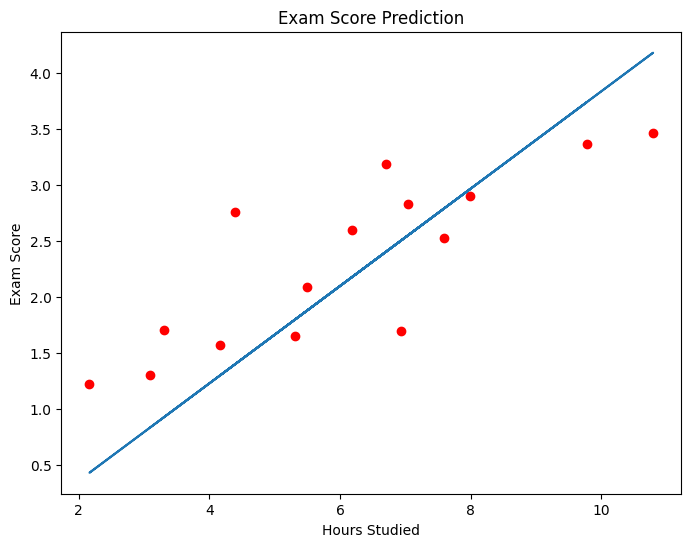

In [108]:
fig: plt.Figure = plt.figure(figsize=(8, 6))
plt.plot(x_train.numpy(), y_train.numpy(), "ro", label="Original Data")
plt.plot(x_train.numpy(), predicted.detach().numpy(), label="Fitted Line")
plt.xlabel(xlabel="Hours Studied")
plt.ylabel(ylabel="Exam Score")
plt.title(label="Exam Score Prediction")
plt.show()

In [109]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.4350]])),
             ('linear.bias', tensor([-0.5135]))])

## 7. Test the Model with New Data Points

In [110]:
hours_studied: torch.Tensor = torch.Tensor([[8.0]])

In [111]:
model.eval()
with torch.no_grad():
    new_predicted = model(hours_studied)
print(
    f"Predicted score if a person studies for {hours_studied[0][0]} hours: {new_predicted[0][0]:.3f}"
)

Predicted score if a person studies for 8.0 hours: 2.966


In [115]:
print(new_predicted.item())
new_predicted.numpy()

2.9663565158843994


array([[2.9663565]], dtype=float32)

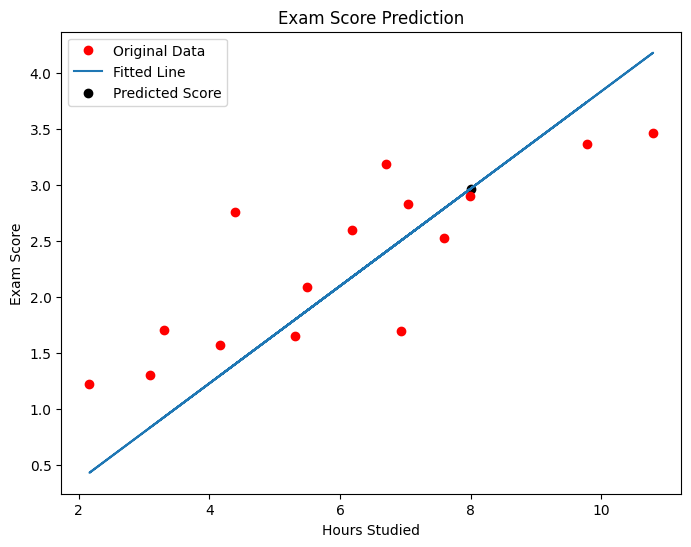

In [117]:
fig: plt.Figure = plt.figure(figsize=(8, 6))
plt.plot(x_train.numpy(), y_train.numpy(), "ro", label="Original Data")
plt.plot(x_train.numpy(), predicted.detach().numpy(), label="Fitted Line")
plt.scatter(
    x=[hours_studied], y=[new_predicted.numpy()], color="black", label="Predicted Score"
)
plt.xlabel(xlabel="Hours Studied")
plt.ylabel(ylabel="Exam Score")
plt.title(label="Exam Score Prediction")
plt.legend(loc="upper left")
plt.show()

In [118]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.4350]])),
             ('linear.bias', tensor([-0.5135]))])

In [121]:
torch.save(obj=model.state_dict(), f="../models/linear_Regression_model.pth")